In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import matplotlib.image as mpimg
from tkinter import filedialog

In [2]:
DATA_DIR =  r"D:\Ghaniy\Semester 5\MBKM\2024\Bangkit\Capstone\Dataset Dipake\train"

In [3]:
data_dir_ba = os.path.join(DATA_DIR, 'ba')
data_dir_ca = os.path.join(DATA_DIR, 'ca')
data_dir_da = os.path.join(DATA_DIR, 'da')
data_dir_dha = os.path.join(DATA_DIR, 'dha')
data_dir_ga = os.path.join(DATA_DIR, 'ga')
data_dir_ha = os.path.join(DATA_DIR, 'ha')
data_dir_ja = os.path.join(DATA_DIR, 'ja')
data_dir_ka = os.path.join(DATA_DIR, 'ka')
data_dir_la = os.path.join(DATA_DIR, 'la')
data_dir_ma = os.path.join(DATA_DIR, 'ma')
data_dir_na = os.path.join(DATA_DIR, 'na')
data_dir_nga = os.path.join(DATA_DIR, 'nga')
data_dir_nya = os.path.join(DATA_DIR, 'nya')
data_dir_pa = os.path.join(DATA_DIR, 'pa')
data_dir_ra = os.path.join(DATA_DIR, 'ra')
data_dir_sa = os.path.join(DATA_DIR, 'sa')
data_dir_ta = os.path.join(DATA_DIR, 'ta')
data_dir_tha = os.path.join(DATA_DIR, 'tha')
data_dir_wa = os.path.join(DATA_DIR, 'wa')
data_dir_ya = os.path.join(DATA_DIR, 'ya')


print(f"1. There are {len(os.listdir(data_dir_ba))}  for ba images.")
print(f"2. There are {len(os.listdir(data_dir_ca))} for ca images.")
print(f"3. There are {len(os.listdir(data_dir_da))} for da images.")
print(f"4. There are {len(os.listdir(data_dir_dha))} for dha images.")
print(f"5. There are {len(os.listdir(data_dir_ga))} for ga images.")
print(f"6. There are {len(os.listdir(data_dir_ha))} for ha images.")
print(f"7. There are {len(os.listdir(data_dir_ja))} for ja images.")
print(f"8. There are {len(os.listdir(data_dir_ka))} for ka images.")
print(f"9. There are {len(os.listdir(data_dir_la))} for la images.")
print(f"10. There are {len(os.listdir(data_dir_ma))} for ma images.")
print(f"11. There are {len(os.listdir(data_dir_na))} for pa images.")
print(f"12. There are {len(os.listdir(data_dir_nga))} for nga images.")
print(f"13. There are {len(os.listdir(data_dir_nya))} for nya images.")
print(f"14. There are {len(os.listdir(data_dir_pa))} for pa images.")
print(f"15. There are {len(os.listdir(data_dir_ra))} for ra images.")
print(f"16. There are {len(os.listdir(data_dir_sa))} for sa images.")
print(f"17. There are {len(os.listdir(data_dir_ta))} for ta images.")
print(f"18. There are {len(os.listdir(data_dir_tha))} for tha images.")
print(f"19. There are {len(os.listdir(data_dir_wa))} for wa images.")
print(f"20. There are {len(os.listdir(data_dir_ya))} for ya images.")


1. There are 1323  for ba images.
2. There are 420 for ca images.
3. There are 1362 for da images.
4. There are 420 for dha images.
5. There are 1329 for ga images.
6. There are 1484 for ha images.
7. There are 420 for ja images.
8. There are 1551 for ka images.
9. There are 1437 for la images.
10. There are 1446 for ma images.
11. There are 1512 for pa images.
12. There are 1329 for nga images.
13. There are 420 for nya images.
14. There are 1476 for pa images.
15. There are 1500 for ra images.
16. There are 1464 for sa images.
17. There are 564 for ta images.
18. There are 420 for tha images.
19. There are 1473 for wa images.
20. There are 1323 for ya images.


In [4]:
def train_val_datasets():

  training_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=DATA_DIR,
        image_size=(150, 150),
        batch_size=128,
        label_mode='int',
        validation_split=0.2,
        subset="training",
        seed=42
    )
  validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=DATA_DIR,
        image_size=(150, 150),
        batch_size=128,
        label_mode='int',
        validation_split=0.2,
        subset="validation",
        seed=42
    )
  return training_dataset, validation_dataset

In [5]:
training_dataset, validation_dataset = train_val_datasets()

Found 22673 files belonging to 20 classes.
Using 18139 files for training.
Found 22673 files belonging to 20 classes.
Using 4534 files for validation.


In [6]:
for images, labels in training_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

print(f"Maximum pixel value of images: {np.max(example_batch_images)}\n")
print(f"Shape of batch of images: {example_batch_images.shape}")
print(f"Shape of batch of labels: {example_batch_labels.shape}")

Maximum pixel value of images: 255.0

Shape of batch of images: (128, 150, 150, 3)
Shape of batch of labels: (128,)


In [7]:
data_augmentation = tf.keras.Sequential([
    #tf.keras.layers.RandomRotation(0.1),
    #tf.keras.layers.RandomTranslation(0.1, 0.1),
    #tf.keras.layers.RandomZoom(0.1),
	tf.keras.layers.Rescaling(1./255),
    #tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomContrast(0.1),
])

In [9]:
def create_model():
   model = tf.keras.models.Sequential([
         tf.keras.layers.InputLayer(input_shape=(150, 150, 3), name="input_layer"),
        data_augmentation,
        
        # Convolutional Block 1
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Convolutional Block 2
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Convolutional Block 3
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(20, activation='softmax')
    ])

   model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
   return model

In [10]:
model = create_model()

In [11]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                      

In [12]:
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")



predictions have shape: (128, 20)


In [13]:
history = model.fit(
	training_dataset,
	epochs=15,
	validation_data=validation_dataset,
)

Epoch 1/15
142/142 [==============================] - 313s 2s/step - loss: 1.9788 - accuracy: 0.3856 - val_loss: 0.7789 - val_accuracy: 0.7719
Epoch 2/15
142/142 [==============================] - 283s 2s/step - loss: 0.4431 - accuracy: 0.8638 - val_loss: 0.1121 - val_accuracy: 0.9698
Epoch 3/15
142/142 [==============================] - 294s 2s/step - loss: 0.1485 - accuracy: 0.9531 - val_loss: 0.0638 - val_accuracy: 0.9826
Epoch 4/15
142/142 [==============================] - 270s 2s/step - loss: 0.0824 - accuracy: 0.9749 - val_loss: 0.0589 - val_accuracy: 0.9863
Epoch 5/15
142/142 [==============================] - 261s 2s/step - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.0436 - val_accuracy: 0.9885
Epoch 6/15
142/142 [==============================] - 260s 2s/step - loss: 0.0556 - accuracy: 0.9852 - val_loss: 0.0349 - val_accuracy: 0.9916
Epoch 7/15
142/142 [==============================] - 260s 2s/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.0396 - val_accuracy: 0.9914

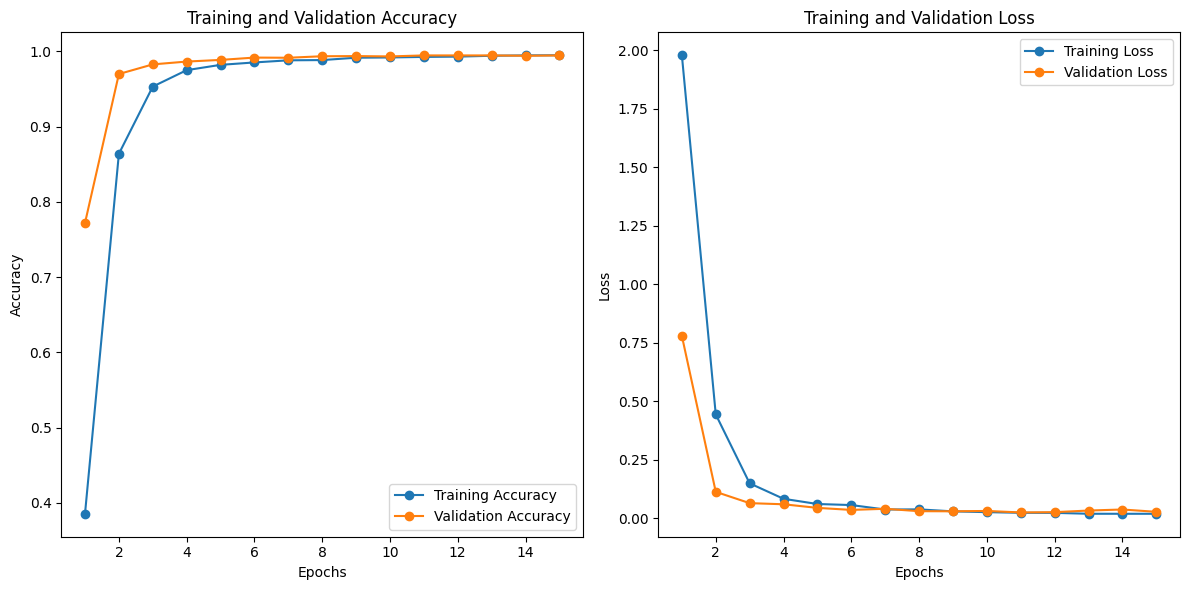

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

In [15]:
model.save("aksara_model.h5")

c:\Users\acer\anaconda3\envs\streamlitenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# Muat model jika perlu (jika belum dimuat)
model = tf.keras.models.load_model("aksara_model.h5")

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model dalam format TFLite
with open("aksara_model.tflite", "wb") as tflite_file:
    tflite_file.write(tflite_model)

print("Model berhasil dikonversi ke TFLite.")


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpaya3x_rq\assets


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpaya3x_rq\assets


Model berhasil dikonversi ke TFLite.
